# Task 3

This notebook is part of Milestone 3, Question 3. You can work on this notebook on your laptop to develop your machine learning model using all the learnings from the previous courses. At the end of this notebook, when you are ready to train the model, you will need to obtain the hyperparameters from the hyperparameter tuning job that you will run in Milestone 3 Question 4 (i.e., the notebook named `Milestone3-Task4.ipynb`).

PS: To speed up the process, you can test the model without the hyperparameters first. Once other team members obtain the hyperparameters, you can retrain the model using those hyperparameters and test it again.

In [1]:
# I asked them to use their laptop so they already got all these packages from previous courses.
# %pip install joblib scikit-learn matplotlib s3fs

# Imports

In [2]:
import numpy as np
import pandas as pd
from joblib import dump, load
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 16, 'axes.labelweight': 'bold', 'figure.figsize': (8,6)})
## add any other additional packages that you need. You are free to use any packages for vizualization.

## Part 1:

Recall as a final goal of this project. We want to build and deploy ensemble machine learning models in the cloud, where features are outputs of different climate models and the target is the actual rainfall observation. In this milestone, you'll actually build these ensemble machine learning models in the cloud.  

**Your tasks:**

1. Read the data CSV from your s3 bucket. 
2. Drop rows with nans. 
3. Split the data into train (80%) and test (20%) portions with `random_state=123`. 
4. Carry out EDA of your choice on the train split. 
5. Train ensemble machine learning model using `RandomForestRegressor` and evaluate with metric of your choice (e.g., `RMSE`) by considering `Observed` as the target column. 
6. Discuss your results. Are you getting better results with ensemble models compared to the individual climate models? 

> Recall that individual columns in the data are predictions of different climate models. 

In [3]:
## Remember by default it looks for credentials in home directory. 
## Make sure your updated credentials are in home directory
## or pass credentials explicitly and pass as storage_options=aws_credentials (not a good idea)
# aws_credentials = {"key": "","secret": "","token":""}
# replace with s3 path to your data
df = pd.read_csv("s3://mds-s3-20-lauren/output/ml_data_SYD.csv", index_col=0, parse_dates=True)
df.shape

(46020, 26)

In [4]:
## Use your ML skills to get from step 1 to step 6

In [5]:
# Drop NA
df = df.dropna(axis=0)
df.shape

(45989, 26)

In [6]:
# Train and test split
train_df, test_df = train_test_split(df, test_size=0.2, random_state=123)
print(train_df.shape)
print(test_df.shape)

(36791, 26)
(9198, 26)


In [7]:
# Perform EDA
train_df.describe().round(3).T

,count,mean,std,min,25%,50%,75%,max
ACCESS-CM2,36791.0,2.429,6.791,0.0,0.054,0.193,1.445,149.968
ACCESS-ESM1-5,36791.0,2.939,7.049,0.0,0.021,0.493,2.399,157.606
AWI-ESM-1-1-LR,36791.0,3.716,7.281,0.0,0.030,0.592,3.602,89.466
BCC-CSM2-MR,36791.0,2.203,6.518,0.0,0.001,0.096,1.319,134.465
BCC-ESM1,36791.0,2.748,5.997,0.0,0.002,0.299,2.478,87.135
CMCC-CM2-HR4,36791.0,3.093,6.459,0.0,0.138,0.634,3.183,124.952
CMCC-CM2-SR5,36791.0,3.575,7.353,-0.0,0.089,0.828,3.728,140.148
CMCC-ESM2,36791.0,3.490,7.039,-0.0,0.093,0.849,3.630,137.592
CanESM5,36791.0,2.879,6.899,0.0,0.022,0.338,2.559,135.570
EC-Earth3-Veg-LR,36791.0,2.565,5.733,-0.0,0.012,0.430,2.296,96.424


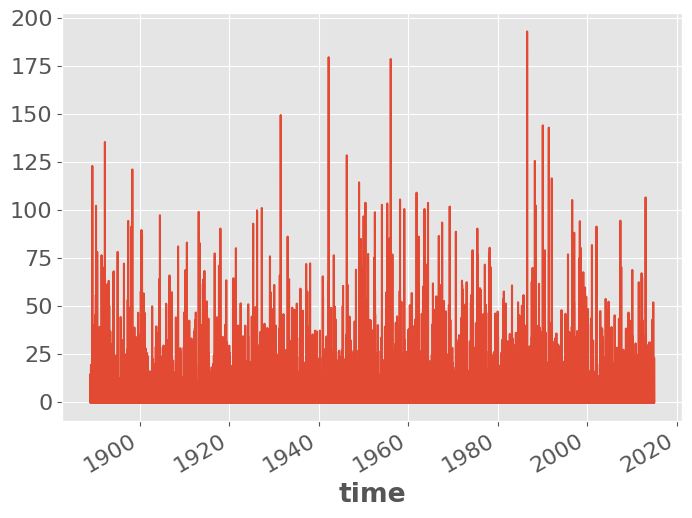

In [8]:
train_df['Observed'].plot()
plt.show()

In [9]:
# Train RandomForestRegressor
X_train = train_df.drop(columns=['Observed'])
y_train = train_df['Observed']

X_test = test_df.drop(columns=['Observed'])
y_test = test_df['Observed']

rf_regressor = RandomForestRegressor(random_state=123)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=123)

In [10]:
predictions = rf_regressor.predict(X_test)
print(f"Root mean squared error: {mean_squared_error(y_test, predictions, squared=False):.2f}")

Root mean squared error: 8.86


In [11]:
# Ensemble vs individual models

individual_models = X_test.columns.to_list()

train_rmse = [mean_squared_error(y_train, X_train[col], squared=False)
              for col in individual_models]
test_rmse = [mean_squared_error(y_test, X_test[col], squared=False)
             for col in individual_models]

results = pd.DataFrame({
    'Model': individual_models,
    'Train RMSE': train_rmse,
    'Test RMSE': test_rmse
}).set_index('Model')

train_pred = rf_regressor.predict(X_train)
test_pred = rf_regressor.predict(X_test)

results.loc['Ensemble'] = {'Train RMSE': mean_squared_error(y_train, train_pred, squared=False),
                           'Test RMSE': mean_squared_error(y_test, test_pred, squared=False)}
results.sort_values('Test RMSE')

,Train RMSE,Test RMSE
Model,,
Ensemble,3.110881,8.860048
KIOST-ESM,9.196532,9.600480
FGOALS-g3,9.284867,9.687788
MRI-ESM2-0,9.609047,9.922795
MPI-ESM1-2-HR,9.489925,9.969823
NESM3,9.371897,9.978137
MPI-ESM1-2-LR,9.681899,10.260886
NorESM2-LM,9.918216,10.410145
EC-Earth3-Veg-LR,9.902149,10.453606


## Part 2:

### Preparation for deploying model next week

***NOTE: Complete Question 4 (`Milestone3-task4.ipynb`) from the milestone 3 before coming here***

We’ve found the best hyperparameter settings with MLlib (from the Question 4 from milestone3), here we then use the same hyperparameters to train a scikit-learn model. 

In [12]:
# Just replace ___ with the numbers you found from Milestone3-task4.ipynb
model = RandomForestRegressor(n_estimators=100, max_depth=5, bootstrap=True, random_state=123)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, random_state=123)

In [13]:
print(f"Train RMSE: {mean_squared_error(y_train, model.predict(X_train), squared=False):.2f}")
print(f" Test RMSE: {mean_squared_error(y_test, model.predict(X_test), squared=False):.2f}")

Train RMSE: 7.89
 Test RMSE: 8.66


#### Discussion of Results

- Here we see that we have reduced the test RMSE from approx. 8.86 to 8.66 after hyperparameter optimization. This roughly translates into a ~2% improvement in the RMSE. This is not a huge improvement, but does indicate that hyperparameter optimization improved the results. However, when compared to the RMSE of the component models, this can be considered a significant improvement, as 8.66 represents an improvement of ~25-30% in some cases.

- As mentioned, it should be noted that the ensemble model is performing better than the individual component models; this is expected behaviour and our results have confirmed this. We see RMSE in the component models range from 9.6-12.3, indicating the Random Forest Regressor is performing well as an ensemble and reducing RMSE against observed values. 

In [24]:
# ready to deploy
# where this model is saved? Understand the concept of relative path.
dump(model, "model.joblib")

***Upload model.joblib to s3 under output folder. You choose how you want to upload it (using CLI, SDK, or web console).*** Web console is also completely fine as it is a small file.

In [25]:
import logging
import boto3
from botocore.exceptions import ClientError

s3_client = boto3.client('s3')
try:
    response = s3_client.upload_file("model.joblib", "s3://mds-s3-20-lauren/output/")
except ClientError as e:
    logging.error(e)